In [1]:
import pandas as pd

In [3]:
df = pd.read_excel(r'C:\Users\emmanueltorres\Downloads\Scripts\streamlit\risco_credito\credit_scoring\Scoringdata.xls')
df.head()

,ID Prêt,Date Déblocage,Maturité mois,Montant Prêt BAM,Sexe,Etat Civil,Niveau Formation,Age ans,Ans à l'adresse,Locataire / Propriétaire,Nbre de Dépendants,Ans en Activité,Emplacement du business,Crédit Bureau négatif=1,NbreEmployésFamille,Type d'Activité,Ventes Mensuelles BAM,Bad91d+=1
0,RRB48,2018-07-24,23,8200,Male,Divorced,Completed University,32.0,1.0,RENT,2,1.0,Region3,0,1,Craftsperson,2550,0
1,KDI90,2018-07-04,21,9575,Male,Widowed,Completed University,44.0,7.0,RENT,1,7.0,Region1,0,1,Personal Services,1950,0
2,NKU187,2018-07-19,21,8200,Female,Married,Completed University,43.0,7.5,Own,5,7.5,Region3,0,3,Personal Services,1775,0
3,UNO260,2018-05-06,22,8425,Male,Married,Completed University,NaN,5.5,Own,3,5.5,Region4,0,3,Personal Services,1800,0
4,QTA277,2018-03-01,21,7625,Female,Married,Completed University,49.0,10.0,Own,3,8.0,Region3,1,3,Car Repair,5275,0


In [4]:
df_copy = df.copy()
#df_copy.head()

In [5]:
df_copy = df_copy.drop(['ID Prêt','Date Déblocage'], axis =1)
#df_copy.head()


In [6]:
from pycaret.classification import*
st = setup(data =df_copy, target = 'Bad91d+=1',session_id=123)

,Description,Value
0,Session id,123
1,Target,Bad91d+=1
2,Target type,Binary
3,Original data shape,"(2333, 16)"
4,Transformed data shape,"(2333, 33)"
5,Transformed train set shape,"(1633, 33)"
6,Transformed test set shape,"(700, 33)"
7,Ordinal features,2
8,Numeric features,9
9,Categorical features,6


In [7]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:28:50
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [8]:
xgboost = create_model('xgboost')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:30:25
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9695,0.9959,0.9706,0.9802,0.9754,0.9354,0.9355
1,0.9634,0.9855,0.9510,0.9898,0.9700,0.9232,0.9244
2,0.9878,0.9975,0.9804,1.0000,0.9901,0.9742,0.9746
3,0.9693,0.9947,0.9604,0.9898,0.9749,0.9355,0.9362
4,0.9632,0.9950,0.9604,0.9798,0.9700,0.9224,0.9227
5,0.9816,0.9923,0.9706,1.0000,0.9851,0.9611,0.9618
6,0.9632,0.9887,0.9706,0.9706,0.9706,0.9214,0.9214
7,0.9632,0.9892,0.9608,0.9800,0.9703,0.9219,0.9222
8,0.9755,0.9989,0.9902,0.9712,0.9806,0.9473,0.9476


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [9]:
tuned_xgboost = tune_model(xgboost)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:30:32
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9756,0.9964,0.9608,1.0000,0.9800,0.9488,0.9500
1,0.9695,0.9889,0.9510,1.0000,0.9749,0.9362,0.9381
2,0.9817,0.9984,0.9706,1.0000,0.9851,0.9615,0.9622
3,0.9693,0.9954,0.9505,1.0000,0.9746,0.9359,0.9378
4,0.9693,0.9939,0.9505,1.0000,0.9746,0.9359,0.9378
5,0.9632,0.9944,0.9412,1.0000,0.9697,0.9229,0.9257
6,0.9877,0.9931,0.9804,1.0000,0.9901,0.9740,0.9743
7,0.9755,0.9868,0.9608,1.0000,0.9800,0.9483,0.9496
8,0.9877,0.9963,0.9804,1.0000,0.9901,0.9740,0.9743


Fitting 10 folds for each of 10 candidates, totalling 100 fits


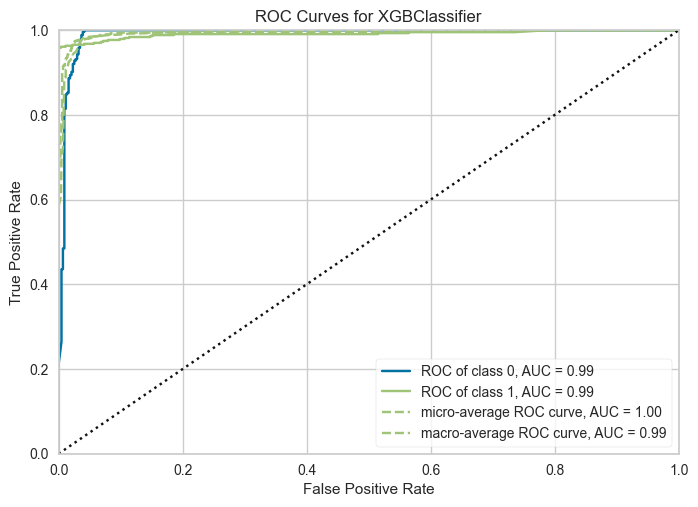

In [10]:
plot_model(tuned_xgboost, plot='auc')

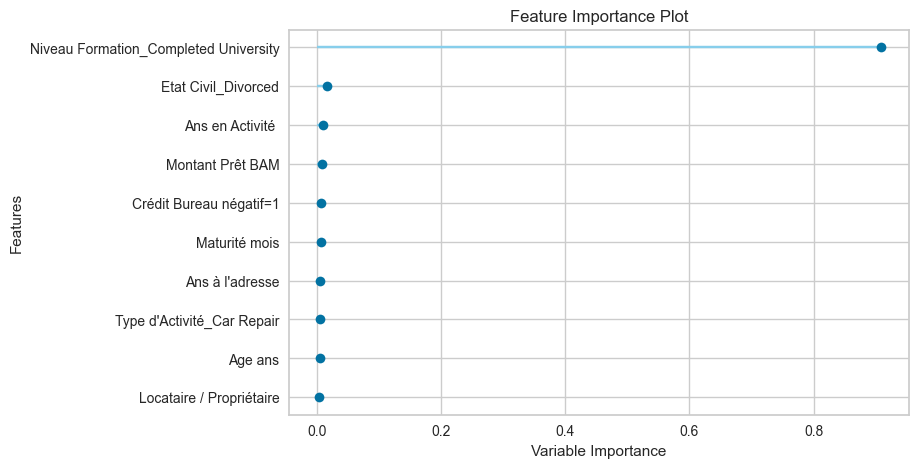

In [11]:
plot_model(tuned_xgboost,plot='feature')

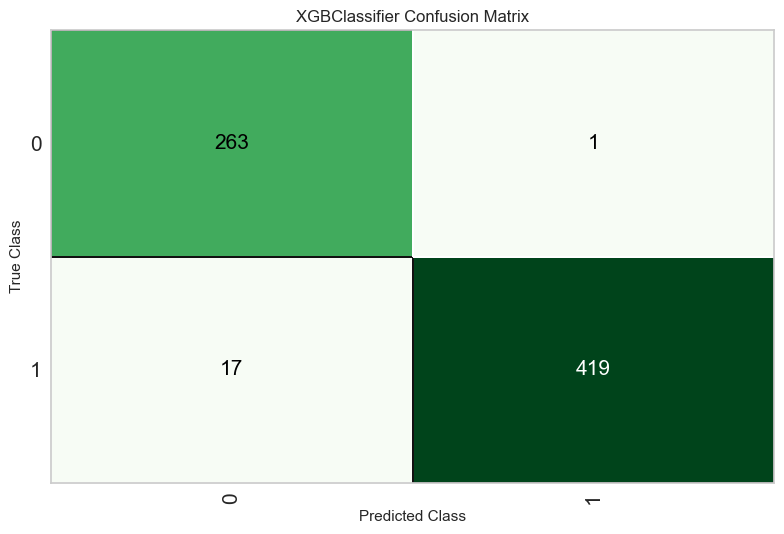

In [12]:
plot_model(tuned_xgboost, plot='confusion_matrix')

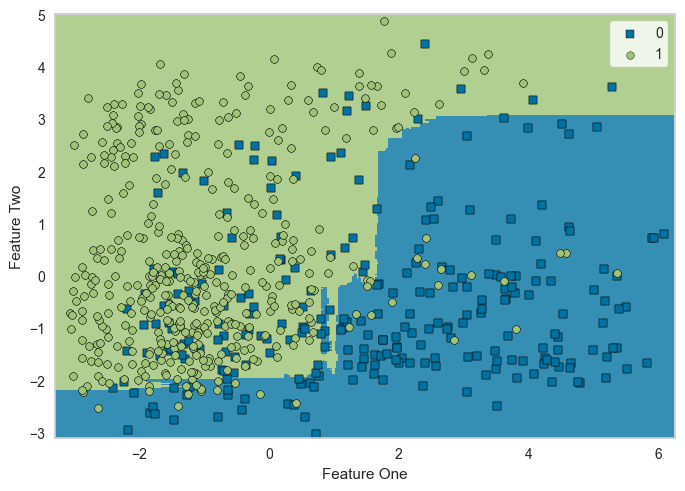

In [13]:
plot_model(tuned_xgboost, plot='boundary')

In [14]:
predict_model(tuned_xgboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9743,0.9914,0.9610,0.9976,0.9790,0.9459,0.9470


,Maturité mois,Montant Prêt BAM,Sexe,Etat Civil,Niveau Formation,Age ans,Ans à l'adresse,Locataire / Propriétaire,Nbre de Dépendants,Ans en Activité,Emplacement du business,Crédit Bureau négatif=1,NbreEmployésFamille,Type d'Activité,Ventes Mensuelles BAM,Bad91d+=1,prediction_label,prediction_score
2170,23,11400,Female,Married,Secondary School to Grade 10,30.0,5.0,RENT,3,3.5,Region3,0,3,Personal Services,1900,1,1,0.5684
1382,20,9225,Male,Divorced,High School Diploma,37.0,2.0,RENT,3,2.0,Region1,0,1,Craftsperson,4325,1,1,0.5684
656,19,8925,Female,Married,Completed University,51.0,16.5,Own,2,9.0,Region5,0,3,Child Care,1425,0,0,0.5603
1363,21,11200,Female,Divorced,High School Diploma,44.0,3.5,RENT,3,3.5,Region3,0,4,Small Grocers,9800,1,1,0.5684
2000,18,10050,Male,Divorced,Secondary School to Grade 10,32.0,0.5,RENT,2,0.5,Region3,0,3,Convenience Store,6375,1,1,0.5684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,19,7175,Male,Divorced,Secondary School to Grade 10,38.0,1.0,RENT,3,1.0,Region3,0,2,Personal Services,1500,1,1,0.5684
223,18,9650,Male,Divorced,Completed University,51.0,7.0,RENT,3,6.0,Region4,0,1,Craftsperson,3525,0,0,0.5342
517,22,11625,Female,Divorced,Completed University,34.0,1.5,RENT,2,1.5,Region4,0,2,Personal Services,1775,0,0,0.5272
1877,23,8050,Female,Divorced,Secondary School to Grade 10,26.0,0.5,RENT,2,0.5,Region5,0,3,Child Care,1150,1,1,0.5684


In [15]:
final_xgboost = finalize_model(tuned_xgboost)

In [16]:
save_model(final_xgboost, r'C:\Users\emmanueltorres\Downloads\Scripts\streamlit\risco_credito\credit_scoring\Final_Model_xgboost')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Maturité mois',
                                              'Montant Prêt BAM', 'Age ans',
                                              "Ans à l'adresse",
                                              'Nbre de Dépendants',
                                              'Ans en Activité ',
                                              'Crédit Bureau négatif=1',
                                              'NbreEmployésFamille',
                                              'Ventes Mensuelles BAM'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty...
  